In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ==========================
# 1. LOAD DATA
# ==========================

# Change filenames here if needed
PHONE_FILE = "Gravity.csv"
ARDUINO_FILE = "Raw data (g)_arduino.csv"

df_phone = pd.read_csv(PHONE_FILE)
df_arduino = pd.read_csv(ARDUINO_FILE)

print("=== Smartphone dataset head ===")
print(df_phone.head())
print("\n=== Arduino dataset head ===")
print(df_arduino.head())


=== Smartphone dataset head ===
   Time (s)  Gravity X (m/s^2)  Gravity Y (m/s^2)  Gravity Z (m/s^2)
0  0.010794           0.246461           0.662833           9.784478
1  0.020813           0.246931           0.662475           9.784490
2  0.030832           0.247025           0.662218           9.784506
3  0.040851           0.247879           0.661734           9.784517
4  0.050870           0.247772           0.661552           9.784532

=== Arduino dataset head ===
   Time t (s)  Acceleration x (g)  Acceleration y (g)  Acceleration z (g)  \
0       1.294           -0.021362            0.024780            0.994019   
1       1.304           -0.021484            0.024536            0.993164   
2       1.314           -0.022217            0.023926            0.994507   
3       1.325           -0.022461            0.023560            0.994995   
4       1.335           -0.022217            0.023926            0.993896   

   Absolute Acceleration (g)  
0                   0.994557  

In [3]:
# ==========================
# 2. BASIC STATS: MEAN & STD
# ==========================

print("\n=== Smartphone: mean & std ===")
phone_stats = df_phone.describe().loc[["mean", "std"]]
print(phone_stats)

print("\n=== Arduino: mean & std ===")
arduino_stats = df_arduino.describe().loc[["mean", "std"]]
print(arduino_stats)

# Extract std values for bar chart later
phone_std_x = phone_stats.loc["std", "Gravity X (m/s^2)"]
phone_std_y = phone_stats.loc["std", "Gravity Y (m/s^2)"]
phone_std_z = phone_stats.loc["std", "Gravity Z (m/s^2)"]

arduino_std_x = arduino_stats.loc["std", "Acceleration x (g)"]
arduino_std_y = arduino_stats.loc["std", "Acceleration y (g)"]
arduino_std_z = arduino_stats.loc["std", "Acceleration z (g)"]



=== Smartphone: mean & std ===
       Time (s)  Gravity X (m/s^2)  Gravity Y (m/s^2)  Gravity Z (m/s^2)
mean  10.711184           0.255186           0.665335           9.784084
std    6.182216           0.002856           0.002244           0.000146

=== Arduino: mean & std ===
      Time t (s)  Acceleration x (g)  Acceleration y (g)  Acceleration z (g)  \
mean   10.714055           -0.022198            0.024781            0.993805   
std     5.534367            0.000896            0.000874            0.000757   

      Absolute Acceleration (g)  
mean                   0.994362  
std                    0.000757  


In [4]:
# ==========================
# 3. REAL SAMPLING FREQUENCIES
# ==========================

# Smartphone
dt_phone = df_phone["Time (s)"].diff().mean()
freq_phone = 1.0 / dt_phone
print("\n=== Smartphone sampling frequency ===")
print("Average dt (s):", dt_phone)
print("Real sampling frequency (Hz):", freq_phone)

# Arduino
dt_arduino = df_arduino["Time t (s)"].diff().mean()
freq_arduino = 1.0 / dt_arduino
print("\n=== Arduino sampling frequency ===")
print("Average dt (s):", dt_arduino)
print("Real sampling frequency (Hz):", freq_arduino)


=== Smartphone sampling frequency ===
Average dt (s): 0.010019099953965355
Real sampling frequency (Hz): 99.80936457313419

=== Arduino sampling frequency ===
Average dt (s): 0.012422425260756192
Real sampling frequency (Hz): 80.49957870618952


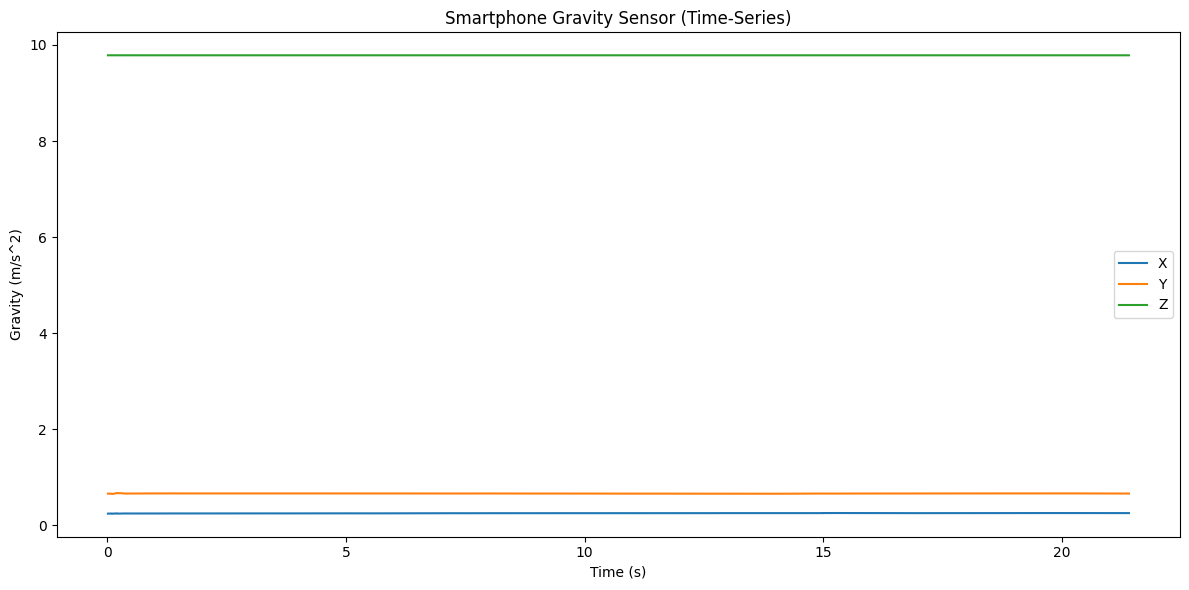

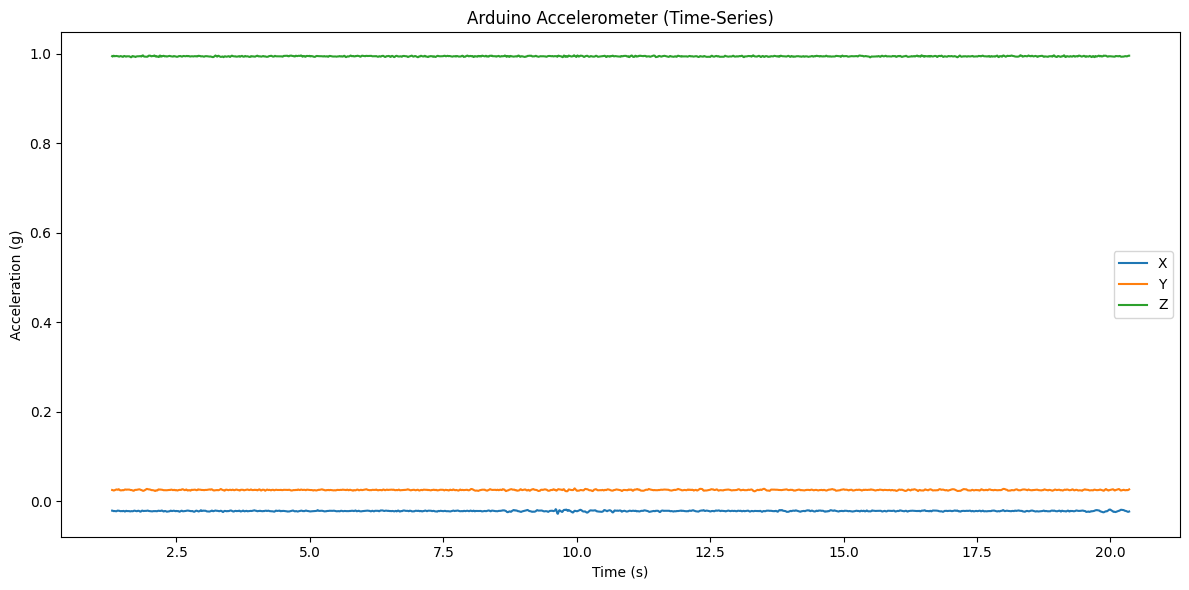

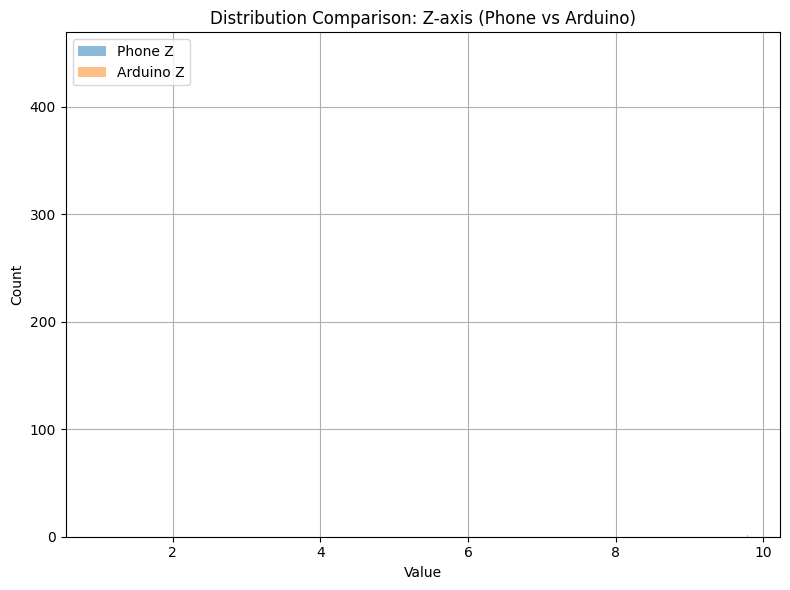

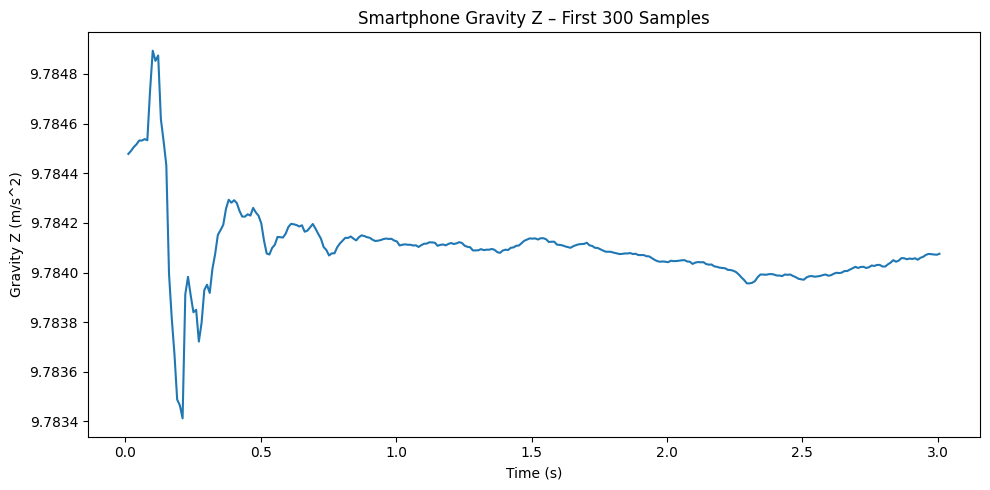

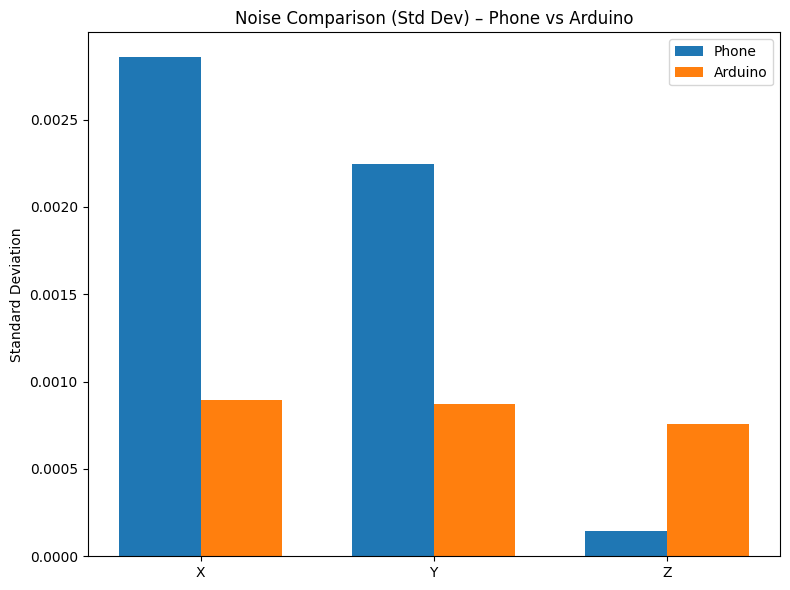

In [ ]:
# ==========================
# 4. PLOTS
# ==========================

# ---------- 4.1 Smartphone time-series X/Y/Z ----------
plt.figure(figsize=(12, 6))
plt.plot(df_phone["Time (s)"], df_phone["Gravity X (m/s^2)"], label="X")
plt.plot(df_phone["Time (s)"], df_phone["Gravity Y (m/s^2)"], label="Y")
plt.plot(df_phone["Time (s)"], df_phone["Gravity Z (m/s^2)"], label="Z")
plt.xlabel("Time (s)")
plt.ylabel("Gravity (m/s^2)")
plt.title("Smartphone Gravity Sensor (Time-Series)")
plt.legend()
plt.tight_layout()
plt.show()
# ---------- 4.2 Arduino time-series X/Y/Z ----------
plt.figure(figsize=(12, 6))
plt.plot(df_arduino["Time t (s)"], df_arduino["Acceleration x (g)"], label="X")
plt.plot(df_arduino["Time t (s)"], df_arduino["Acceleration y (g)"], label="Y")
plt.plot(df_arduino["Time t (s)"], df_arduino["Acceleration z (g)"], label="Z")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (g)")
plt.title("Arduino Accelerometer (Time-Series)")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4.3 Histogram of Z axis (Phone vs Arduino) ----------
df_arduino["Acceleration z (m/s^2)"] = df_arduino["Acceleration z (g)"] * 9.80665
plt.figure(figsize=(8, 6))
df_phone["Gravity Z (m/s^2)"].hist(alpha=0.5, bins=30, label="Phone Z")
df_arduino["Acceleration z (g)"].hist(alpha=0.5, bins=30, label="Arduino Z")
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Distribution Comparison: Z-axis (Phone vs Arduino)")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4.4 Zoom on first 300 samples of smartphone Z ----------
n_zoom = 300
plt.figure(figsize=(10, 5))
plt.plot(df_phone["Time (s)"][:n_zoom], df_phone["Gravity Z (m/s^2)"][:n_zoom])
plt.xlabel("Time (s)")
plt.ylabel("Gravity Z (m/s^2)")
plt.title(f"Smartphone Gravity Z – First {n_zoom} Samples")
plt.tight_layout()
plt.show()

# ---------- 4.5 Bar plot of std dev (noise comparison) ----------
labels = ["X", "Y", "Z"]
phone_std = [phone_std_x, phone_std_y, phone_std_z]
arduino_std = [arduino_std_x, arduino_std_y, arduino_std_z]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, phone_std, width, label="Phone")
plt.bar(x + width/2, arduino_std, width, label="Arduino")
plt.xticks(x, labels)
plt.ylabel("Standard Deviation")
plt.title("Noise Comparison (Std Dev) – Phone vs Arduino")
plt.legend()
plt.tight_layout()
plt.show()
